<a href="https://colab.research.google.com/github/kyle-gao/ML_ipynb/blob/master/DBSCAN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright 2020 Yi Lin(Kyle) Gao

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 .


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [323]:
centroid1 = [3,2.7]
centroid2 = [-4,-1.6]
sigma1 = [1,1]
sigma2 = [1.5,2]
cluster1 = np.random.normal(centroid1,sigma1, (100,2))
cluster2 = np.random.normal(centroid2,sigma2, (150,2))
noise = np.random.normal([0,0],[10,10],(10,2))

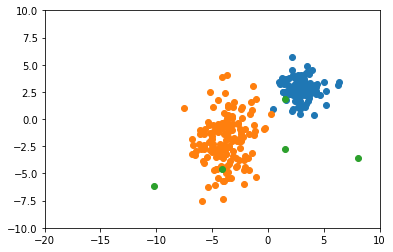

In [324]:
plt.scatter(cluster1[:,0],cluster1[:,1])
plt.scatter(cluster2[:,0],cluster2[:,1])
plt.scatter(noise[:,0],noise[:,1])
plt.xlim(-20, 10)
plt.ylim(-10, 10)
plt.show()

In [ ]:
def find_neighbours(eps, q, points):
  """
  inputs:
  eps - float, radius of neighbourhood
  q - vector, center of neighbourhood
  points - list of vectors, list of points to be scanned
  returns:
  a np.array containing the indices of points p in points within eps of q.

  """
  dist = np.linalg.norm(q-points, axis = 1)
  return np.where(dist < eps)[0]

In [374]:
pts = np.concatenate((cluster1,cluster2,noise),axis=0)
np.random.shuffle(pts)

In [369]:
def dbscan(points, eps, minpts):
  """
  inputs:
  points - a list of vectors
  eps - float, radius of neighbourhood
  minpts - minimum density
  returns: 
  labels - a list of int labels. -1 corresponds to noise, n > 0 correspond to nth cluster
  """
  labels = np.zeros(len(points))
  c = 0
  for idx in range(len(points)):
    if labels[idx] != 0:  #skip visited points
      continue
    neighbours = find_neighbours(eps,points[idx], points)
    if len(neighbours) < minpts: #assign to noise if neighbourhood does not meet density requirement
      labels[idx] = -1 
    else:
      c = c +1.0
      labels[idx] = c
      expand_cluster(points, eps, minpts, labels, neighbours, c)
  return labels

In [370]:
def expand_cluster(points, eps, minpts, labels, neighbours, c):
  """
  collect density reachable points from neighbours and assign them to the corresponding cluster.
  inputs:
  points - a list of vectors
  eps - float, radius of neighbourhood
  minpts - minimum density
  neighbours - a list of indexes of points corresponding to a neighbourhood
  c - int, a cluster label

  """

  i = 0 #i indexes postion in neighbours, a list of index.
  while i<len(neighbours):
    q_idx = neighbours[i]
    i = i+1
    if labels[q_idx] == -1:
      labels[q_idx] = c
    if labels[q_idx] == 0:
      labels[q_idx] = c
      q_neighbours = find_neighbours(eps,points[q_idx],points)
      if len(q_neighbours) > minpts:
        neighbours=np.append(neighbours,q_neighbours)     

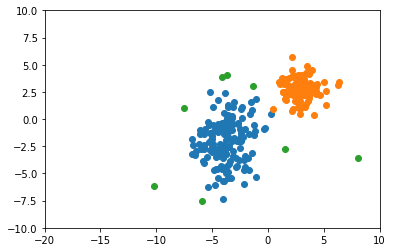

In [379]:
c1 = pts[scanned_points==1]
c2 = pts[scanned_points==2]
noise = pts[scanned_points==-1]

plt.scatter(c1[:,0],c1[:,1])
plt.scatter(c2[:,0],c2[:,1])
plt.scatter(noise[:,0],noise[:,1])
plt.xlim(-20, 10)

plt.ylim(-10, 10)
plt.show()